<a href="https://colab.research.google.com/github/Davidjr2889/Davidjr2889/blob/main/Credit_risk_dataset_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTUDO DE RISCO DE CREDITO**

O risco de crédito nada mais é do que a possibilidade de inadimplência que pode ocorrer em uma transação financeira. Quando uma pessoa ou empresa se dirige ao banco — para a tomada de um empréstimo, por exemplo —, antes de concedê-lo, a instituição faz uma análise do perfil do candidato e seu risco para o banco.

Para fazer essa análise de risco, a organização verifica se o tomador sempre honrou seus compromissos no mercado ou se em algum momento deixou de pagar suas dívidas.

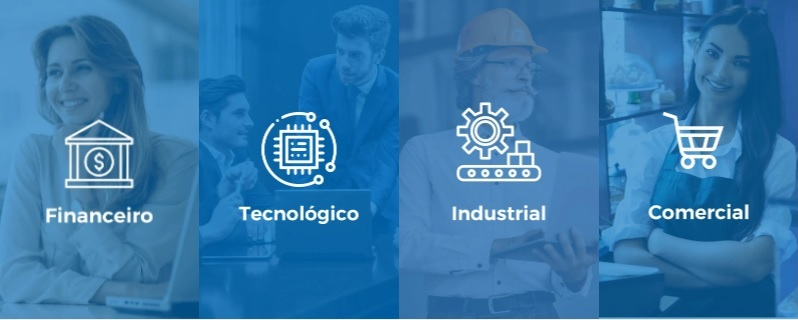


A proporção de brasileiros endividados encerrou o ano de 2021 em patamar recorde, segundo a CNC (Confederação Nacional do Comércio de Bens, Serviços e Turismo). Em dezembro, 76,3% possuíam dívidas, maior patamar da série histórica iniciada em janeiro de 2010, de acordo com os dados da Peic (Pesquisa de Endividamento e Inadimplência do Consumidor) divulgada hoje.

Na média do ano, 70,9% das famílias estavam endividadas, um aumento de 4,4 pontos porcentuais em relação aos 66,5% registrados na média de 2020. "A taxa de incremento de famílias com dívidas também foi a maior já observada, revelando que as famílias recorreram mais ao crédito para sustentar o consumo", apontou a CNC, em nota à imprensa. A pesquisa da CNC considera como dívidas as contas a pagar em cartão de crédito, cheque especial, cheque pré-datado, crédito consignado, crédito pessoal, carnês, financiamento de carro e financiamento de casa, entre outras modalidades. Embora o endividamento tenha aumentado, houve pequena redução na inadimplência em 2021. O porcentual de famílias com contas ou dívidas em atraso diminuiu 0,3 ponto porcentual, de uma média de 25,5% em 2020 para 25,2% no ano passado. No mês de dezembro, porém, o total de inadimplentes foi mais elevado: 26,2%.
"Após iniciar 2021 em patamar superior ao observado no fim de 2020, o indicador reduziu-se até maio, mas passou a apresentar tendência de alta desde então, encerrando o ano em 26,2% das famílias, acima da média anual", ponderou a CNC no estado. "Apesar de a proporção de famílias com contas/dívidas atrasadas ter acirrado no último trimestre do ano, vale notar que o máximo já observado no percentual do indicador ocorreu em agosto de 2020, quando alcançou 26,7%", afirmou. A proporção de famílias que declararam não ter condições de pagar suas contas em atraso e que, portanto, permaneceriam inadimplentes, diminuiu de 11,0% na média de 2020 para 10,5% em 2021.

*Dessa aqui: Curti muuuuuito essa introdução. Ficou muito legal!*

# Importando dados

Os dados que usaremos neste projeto, foram disponibilizados por um site de base de dados estatisticas como Keagle.
O objetivo da análise é buscar relações estatísticas que possam nos dar alguns insights sobre o risco de crédito tanto para credores quanto para tomadores. Dado que as variáveis e o contexto do conjunto de dados não estão totalmente explicados, não vamos levar em consideração eventos macroeconômicos externos, que poderiam alterar completamente os resultados da análise. Por exemplo, diferentes países podem ter exigências de empréstimos diferentes, ou diferentes fases do ciclo econômico podem terminar em um cenário muito diferente. Portanto, o objetivo da análise é puramente descritivo e deve ser adaptado de acordo com as circunstâncias.*Texto em itálico*

## IMPORTAÇÃO DE BIBLIOTECAS

In [40]:
# Ocultar alarmes
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [158]:
# Librarias para manipulação de séries e dataframe 
import pandas as pd
import numpy as np

# Librarias para representações gráficas.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librarias para transformar variaveis categoricas em numericas
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Librarias para treinamento
from sklearn.model_selection import train_test_split

# Librarias para balanceamento de dados
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

# Modelo de treinameto Arvore de decisão('machine learning')
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz

# Modelo de treinameto Naive Bayes ('machine learning')
from sklearn.naive_bayes import GaussianNB

# Librarias de metricas para o modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Libraria para visualisar o aprendizado de maquina.
from yellowbrick.classifier import ConfusionMatrix

# Libraria para calculo é visualização
from IPython.display import Image  

import pydotplus

sns.set()
%matplotlib inline

### LEITURA DA BASE DE DADOS

In [42]:
# Nome do nosso dataset("data")
data = pd.read_csv('credit_risk_dataset.csv')

### VISUALIZAÇÃO DO DATAFRAME

In [43]:
# Vamos visualizar as primeiras 3 linhas do nosso dataset
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


### OBTER INFORMAÇOES GERAIS SOBRE O DATASET

In [44]:
# Chekeando o tamanho do dataset
print('features:\t{}'.format(data.shape[1]))
print('entries:\t{}'.format(data.shape[0]))

# chequeando o typo de variaveis
display(data.info())


features:	12
entries:	32581
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

Podemos observar que existem dados faltantes na coluna 'person_emp_lenght' e 'loan_in_rate', mas pode ser que alguem nao tenha percebido e por segurança vamos executar o proximo codigo para confirmar se realmente existem dados faltantes.

*Dessa aqui: Aqui já dava pra ver que algumas colunas iam ter dados faltantes, hien? Se você olhar o número total de linhas em entries e depois comparar com os valores de non-null daria pra ver que nem todas as colunas chegam ao número total de linhas não nulas, mas achei ótimo que você executou o código seguinte para verificar e ter certeza*


**Chamado e soma de todos os dados do dataset**

In [45]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

podemos observar que existem dados faltantes dentro do dataset

**Visualizando algumas estatisticas do dataset**

usando o metodo describe(), podemos visualizar uma distribuição estatistica do dataframe. usando esse metodo podemos obter informação que pode auxiliarmos:



1.   Identifica outliers
2.   Entender a distribuição de dados
3.   Identificar falhas na distribuição de dados








Para este conjunto de dados, aplicaremos a funcionalidade describe() para as colunas 'person_age', 'person_income' e 'loan_amnt'.


No entanto nota-se que o valor medio de divida para pessoas entre 27 - 28 anos é de 9.589, porém tambem o ingresso medio é de $ 66.074,84. 

In [46]:
data[['person_age','person_income','loan_amnt','loan_status']].describe()

,person_age,person_income,loan_amnt,loan_status
count,32581.000000,3.258100e+04,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,0.218164
std,6.348078,6.198312e+04,6322.086646,0.413006
min,20.000000,4.000000e+03,500.000000,0.000000
25%,23.000000,3.850000e+04,5000.000000,0.000000
50%,26.000000,5.500000e+04,8000.000000,0.000000
75%,30.000000,7.920000e+04,12200.000000,0.000000
max,144.000000,6.000000e+06,35000.000000,1.000000


**Contagem de registro para Normal = 0  e inadiplente = 1**

In [47]:
np.unique(data['loan_status'], return_counts=True)

(array([0, 1]), array([25473,  7108]))

A partir desse ponto podemos visualizar que nossa variavel 'loan_status' desde ja aparece desbalanceada. mas vamos aplicar alguns graficos para visualizar de melhor forma e entender junto algumas estatisticas.

**Verificação de distribuição da variavel target, visualizando os dados em cru**

Observando o grafico podemos observar que existe um desbalanceamento consideravel, pois o evento de 'inadiplencia' é muito menor que o evento de pago 'normal'. 

0    25473
1     7108
Name: loan_status, dtype: int64
\Inadiplencia representa. 21.82% of Dataset.



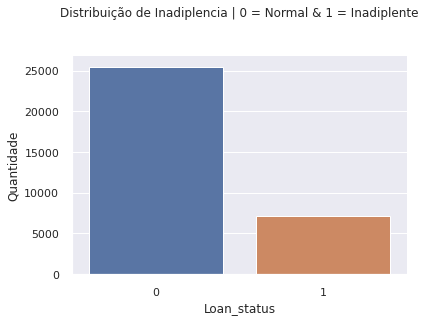

In [48]:
print(data.loan_status.value_counts())
print('\Inadiplencia representa. {:.2f}% of Dataset.\n'.format((data[data.loan_status == 1].shape[0] / data.shape[0])*100))

fig, ax= plt.subplots()
 
sns.countplot('loan_status', data=data, ax=ax)
ax.set_title('Distribuição de Inadiplencia | 0 = Normal & 1 = Inadiplente', pad=40)
ax.set_xlabel('Loan_status')
ax.set_ylabel('Quantidade')

sns.despine(fig)
plt.show()

Neste grafico será importante ajustar antes de aplicar tecnicas de machine learning para que nao sejam construidos modelos enviesados.

Mais adiante frente falaremos sobre como balancear esses dados

**Podemos identificar a quantidade de inadiplentes e nao inadiplente por idade**

Neste grafico podemos observar a comparação entre quantidade e pessoas que mantem o pagamento em dia como pessoas que estao com o pagamento em atraso.

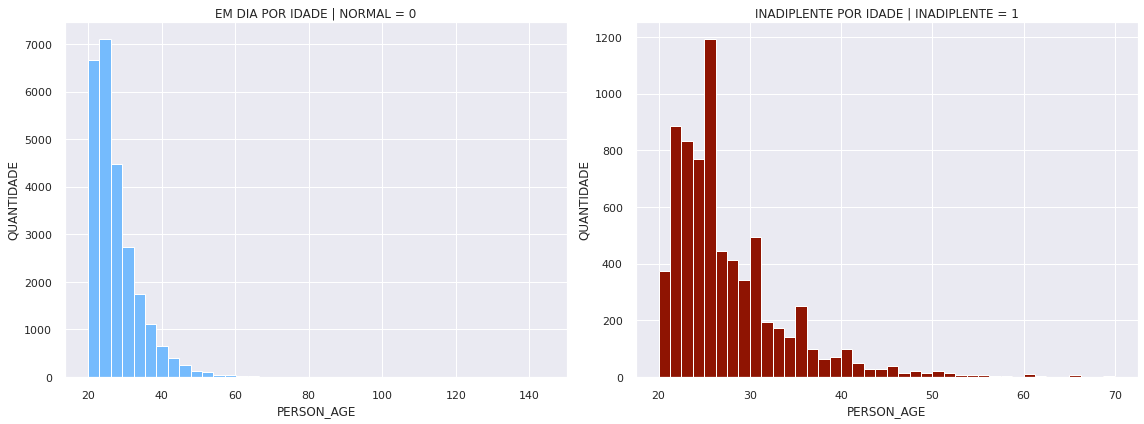

In [49]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
num_bins = 40

ax[0].hist(data.person_age[data.loan_status == 0], bins=num_bins, color='#75bbfd' )
ax[0].set_title('EM DIA POR IDADE | NORMAL = 0')
ax[0].set_xlabel('PERSON_AGE')
ax[0].set_ylabel('QUANTIDADE')

ax[1].hist(data.person_age[data.loan_status == 1], bins=num_bins, color='#8f1402' )
ax[1].set_title('INADIPLENTE POR IDADE | INADIPLENTE = 1')
ax[1].set_xlabel('PERSON_AGE')
ax[1].set_ylabel('QUANTIDADE')

plt.tight_layout()

é possivel contemplar que a inadiplencia acontece em valores muito menores do que as pessoas que pagam em dia. claro considerando que a estrutura nao esta corretamente balanceada.

Também podemos apresentar outra forma de fazer uma separação por faixa etaria, apresentado um novo modelo de negocio que vamos ver mais adiante.

In [50]:
data['faixa_etaria'] = pd.cut(data['person_age'], 3, labels=['jovem', 'adulto', 'senior'])
data['faixa_etaria'] 

0         jovem
1         jovem
2         jovem
3         jovem
4         jovem
          ...  
32576     jovem
32577     jovem
32578    adulto
32579     jovem
32580    adulto
Name: faixa_etaria, Length: 32581, dtype: category
Categories (3, object): ['jovem' < 'adulto' < 'senior']

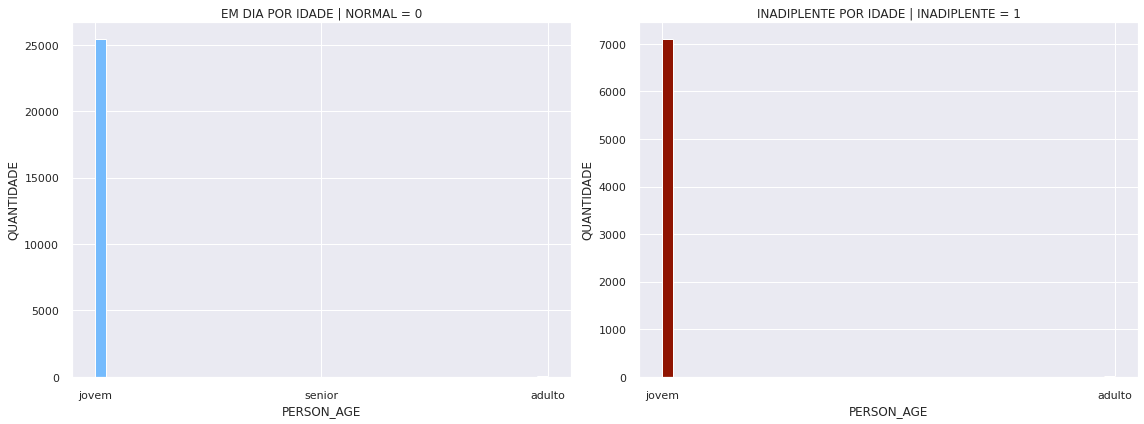

In [51]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
num_bins = 40

ax[0].hist(data.faixa_etaria[data.loan_status == 0], bins=num_bins, color='#75bbfd' )
ax[0].set_title('EM DIA POR IDADE | NORMAL = 0')
ax[0].set_xlabel('PERSON_AGE')
ax[0].set_ylabel('QUANTIDADE')

ax[1].hist(data.faixa_etaria[data.loan_status == 1], bins=num_bins, color='#8f1402' )
ax[1].set_title('INADIPLENTE POR IDADE | INADIPLENTE = 1')
ax[1].set_xlabel('PERSON_AGE')
ax[1].set_ylabel('QUANTIDADE')

plt.tight_layout()

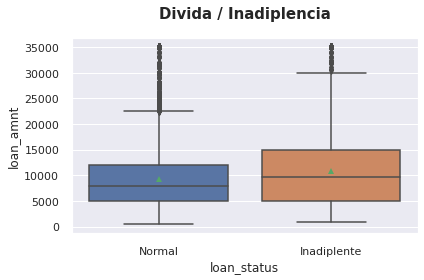

In [52]:
fig, ax = plt.subplots()

sns.boxplot(data.loan_status, data.loan_amnt, showmeans=True, ax=ax)
plt.xticks([0, 1], ['Normal', 'Inadiplente'])
ax.set_title('Divida / Inadiplencia',fontsize=15, fontweight='bold',pad=20)


plt.tight_layout()

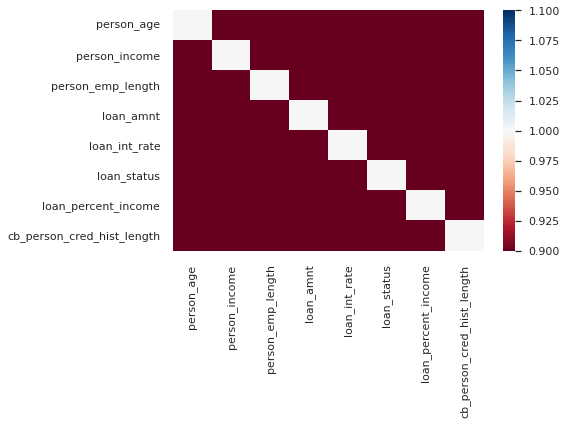

In [53]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu', vmin=1)

plt.tight_layout()
plt.show( )

Visualização de valores por idade, ingresso, divida classificando se paga em dia ou é inadiplente.

In [54]:
grafico = px.scatter_matrix(data, dimensions=['person_age','person_income', 'loan_amnt'], color='loan_status')
grafico.show()

Podemos concluir que essa base de dados é totalmente desbalanceada, pois existe uma diferencia percentual entre pessoas inadiplentes e não inadiplentes.

## ================================================================================================================================================================

# **Preparando os dados**



Para começar a preparar nossos dados, debemos saber qual será nossa variavel target e como vamos a realizar a implementação.

Com a função 'x'.columns podemos ver os nomes das nossas colunas.

In [55]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'faixa_etaria'],
      dtype='object')

Identificamos que nossa variavel target a qual será nossa classe se encontra no medio das variaveis previsoras.
Importante será modificar a estrutura para poder fazer o treinamento

Modificação da estrutura das culunas, enviando a classe no final.

In [56]:
data2 = data[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate',  'loan_percent_income','cb_person_cred_hist_length', 
       'cb_person_default_on_file','loan_status']]

Visaulizando a nova ordem das colunas

In [57]:
data2.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'cb_person_default_on_file', 'loan_status'],
      dtype='object')

In [58]:
data2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,3,Y,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,2,N,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,3,N,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,2,N,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,4,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,30,N,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,19,N,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,28,N,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,26,N,0


**Verificação de dados inconsistentes**

Como podemos perceber, em uma avaliação de credito o normal é que a entidade financeira considere alguns parametros para saber se a pessoa é ou nao inadiplente.

In [59]:
data.loc[data['person_age']<=18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_etaria


Percebemos que nesse dataset nao existem pessoas menores a 18 anos

**Verificando a existencia de dados com a condição maior que 80 anos.**


In [60]:
data.loc[data['person_age']>80].index

Int64Index([81, 183, 575, 747, 32297, 32416, 32506], dtype='int64')

Será importante modificar, eliminar ou preencher alguns valores para poder aproveitar de maneira maxima os dados para quando formos fazer o balanceamento.

Para dados onde o valor da idade seja +80 anos, reemplazaremos por os mesmos 80, para o algoritmo poder aproveitar todos os dados.

In [61]:
data.loc[data2['person_age']>80,'person_age'] = 80
data.loc[data2['person_age']>79]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_etaria
81,80,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3,senior
183,80,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2,senior
575,80,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3,senior
747,80,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4,senior
32297,80,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25,senior
32416,80,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27,adulto
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,0,0.11,N,25,adulto
32506,80,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24,adulto


Podemos visualizar que os registros [81, 183, 575, 747, 32297, 32416, 32506] foram corretamente trocados.

**Verificar renda e divida menor ou igual que 0**

In [62]:
data.loc[data2['person_income']<=0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_etaria


In [63]:
data.loc[data2['loan_amnt']<=0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,faixa_etaria


Não se acharam valores menores que '0'



Como já observamos antes, conseguimos reparar que existem dados faltantes nas colunas 'person_emp_lenght' e 'loan_int_rate'

**Reemplazar os dados faltantes pela media e mediana da coluna**

In [64]:
data2['person_emp_length'].fillna(data2['person_emp_length'].mean(), inplace= True)
data2['loan_int_rate'].fillna(data2['loan_int_rate'].mean(), inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Valores preenchidos pela media da coluna e verificarmos se o preenchimento foi realizado com exito.

In [65]:
data2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
cb_person_default_on_file     0
loan_status                   0
dtype: int64

**Visualizaremos novamente os dados modificados em preenchidos.**

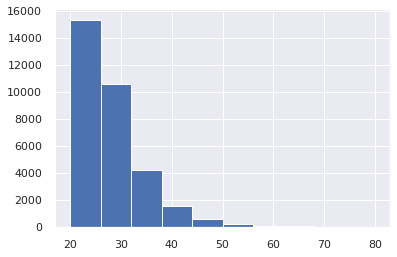

In [68]:
plt.hist(x=data['person_age']);

In [69]:
grafico = px.scatter_matrix(data, dimensions=['person_age','person_income', 'loan_amnt'], color='loan_status')
grafico.show()

## ================================================================================================================================================================

Separação de dados para treinamento e teste "X" e "y"

Olhando o dataset, podemos perceber que tem variaveis categoricas expressadas em colunas, o que nao deberia acontecer para poder treinar com algum metodo de machine learning.

Teremos que transformar variaveis categoricas em numericas, pois os modelos de machine learning, ao ser um modelo de aprendizagem de maquina ele pode preever melhor os dados expressados em numeros e nao em strings

In [70]:
ohe = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[2,4,5,10])], remainder= 'passthrough')

In [85]:
X_data = ohe.fit_transform(X_data)

In [86]:
X_data

array([[1.0, 0.0, 1.0, ..., 16.02, 0.59, 3],
       [0.0, 1.0, 1.0, ..., 11.14, 0.1, 2],
       [1.0, 0.0, 1.0, ..., 12.87, 0.57, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 10.99, 0.46, 28],
       [1.0, 0.0, 1.0, ..., 11.48, 0.1, 26],
       [1.0, 0.0, 1.0, ..., 9.99, 0.15, 30]], dtype=object)

Podemos observar o dataset com variaveis que antes eram categoricas agora são numericas

E para padronizar os valores usaremos uma função de StandardScaler(), que vai servir para escalar os valores.

In [89]:
X_data = StandardScaler().fit_transform(X_data)
X_data

array([[ 0.29349948, -0.29349948,  0.43638794, ...,  1.62525136,
         3.9314108 , -0.69155444],
       [-3.40716101,  3.40716101,  0.43638794, ...,  0.04163645,
        -0.65745847, -0.93816728],
       [ 0.29349948, -0.29349948,  0.43638794, ...,  0.60304092,
         3.74411001, -0.69155444],
       ...,
       [ 0.29349948, -0.29349948,  0.43638794, ..., -0.00704024,
         2.71395568,  5.47376651],
       [ 0.29349948, -0.29349948,  0.43638794, ...,  0.15197028,
        -0.65745847,  4.98054084],
       [ 0.29349948, -0.29349948,  0.43638794, ..., -0.33155149,
        -0.1892065 ,  5.96699219]])

Definição de dados previsores

In [91]:
X = data2.drop('loan_status', axis = 1).values

In [95]:
X = X_data
X_data

array([[ 0.29349948, -0.29349948,  0.43638794, ...,  1.62525136,
         3.9314108 , -0.69155444],
       [-3.40716101,  3.40716101,  0.43638794, ...,  0.04163645,
        -0.65745847, -0.93816728],
       [ 0.29349948, -0.29349948,  0.43638794, ...,  0.60304092,
         3.74411001, -0.69155444],
       ...,
       [ 0.29349948, -0.29349948,  0.43638794, ..., -0.00704024,
         2.71395568,  5.47376651],
       [ 0.29349948, -0.29349948,  0.43638794, ...,  0.15197028,
        -0.65745847,  4.98054084],
       [ 0.29349948, -0.29349948,  0.43638794, ..., -0.33155149,
        -0.1892065 ,  5.96699219]])

Definição da classe

In [93]:
y = data2.iloc[:,11]
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

Uma vez já pronto com os previsores e a classe podemos fazer a divisao de teste e treinamento. 

In [103]:
X_data_treinamento, X_data_teste, y_treinamento, y_teste = train_test_split(X,y, test_size= 0.25, random_state= 0)

**Balanceamento dos dados**

Usando a libraria imblearn, é possivel aplicar tecnicas de balanceamento fazendo um over sapling 


In [104]:
#aplicando over_sampling
sm= SMOTE()
X, y = sm.fit_resample(X, y)



Balanceamento terminado.


## ============================================================================================================================

## Importaremos ja os dados treinados para um arquivo pickle para implementar protocolos binarios de serialização

Importando dados para pickle

In [105]:
import pickle

In [107]:
with open('c_r.pkl', mode = 'wb') as f:
  pickle.dump([X_data_treinamento, y_treinamento, X_data_teste, y_teste], f)

CARREGANDO PICKLE

In [108]:
with open('c_r.pkl', 'rb') as f:
  X_data_treinamento, y_treinamento, X_data_teste, y_teste = pickle.load(f)

## ============================================================================================================================

## Modelo por arvore de decisão

In [110]:
tree_credit_risk = DecisionTreeClassifier(max_depth=4,criterion="entropy")
tree_credit_risk.fit(X_data_treinamento, y_treinamento)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [112]:
previsoes= tree_credit_risk.predict(X_data_teste)



In [113]:
confusion_matrix(y_teste, previsoes)

array([[5963,  443],
       [1726, 4605]])

In [157]:
print(classification_report(y_teste, previsoes))
print('accuracy score foi:', round(accuracy_score(y_teste, previsoes),3))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      6406
           1       0.91      0.73      0.81      6331

    accuracy                           0.83     12737
   macro avg       0.84      0.83      0.83     12737
weighted avg       0.84      0.83      0.83     12737

accuracy score foi: 0.83


In [132]:
print(roc_auc_score(y_teste, previsoes))

0.8291096622859837


ROC AUC SCORE:
 0.8291


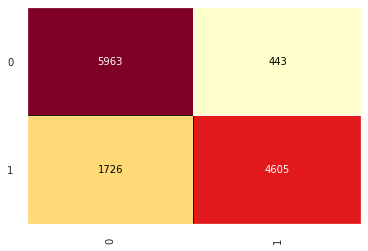

In [140]:
cm = ConfusionMatrix(tree_credit_risk)
cm.fit(X_data_treinamento, y_treinamento)
cm.score(X_data_teste, y_teste)

print('ROC AUC SCORE:\n',round(roc_auc_score(y_teste, previsoes),4))

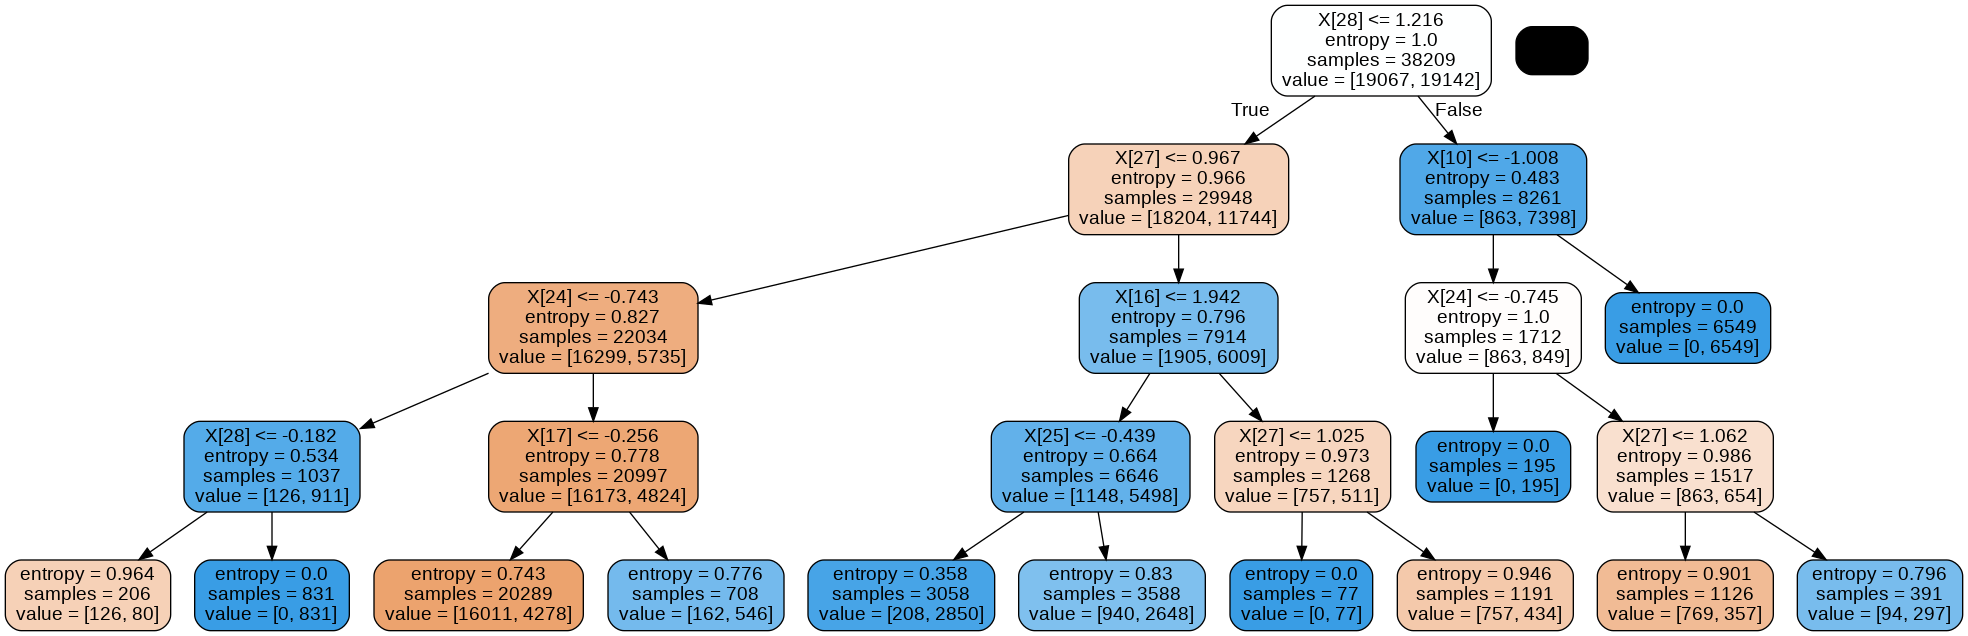

In [151]:
dot = export_graphviz(tree_credit_risk, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

## ============================================================================================================================

Modelo por Naves Bayes

In [120]:
naive_c_data = GaussianNB()
naive_c_data.fit(X_data_treinamento, y_treinamento)

GaussianNB()

In [121]:
previsoes2 = naive_c_data.predict(X_data_teste)

In [122]:
previsoes2

array([0, 0, 0, ..., 0, 1, 0])

In [123]:
accuracy_score(y_teste, previsoes2)

0.6203187563790532

In [124]:
confusion_matrix(y_teste, previsoes2)

array([[6249,  157],
       [4679, 1652]])

              precision    recall  f1-score   support

           0       0.57      0.98      0.72      6406
           1       0.91      0.26      0.41      6331

    accuracy                           0.62     12737
   macro avg       0.74      0.62      0.56     12737
weighted avg       0.74      0.62      0.56     12737



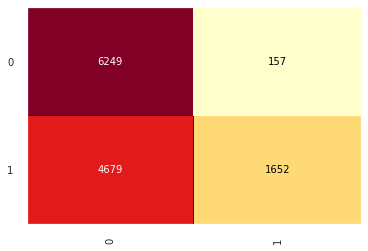

In [130]:
cm = ConfusionMatrix(naive_c_data)
cm.fit(X_data_treinamento, y_treinamento)
cm.score(X_data_teste, y_teste)
print(classification_report(y_teste, previsoes2))

## ============================================================================================================================

## Conclusões:

Criamos 2 Modelos de regresão para casos de inadiplencia e nao inadiplencia:



*   Arvor de decisão
*   Naves bayes

Depois de analizar e fazer uma tabela comparativa, podemos observar que a melhor performance entre arvores de decisão e metodo de naves bayes, foi a de arvores de decisão.

Por tanto, podemos ver que 82% foi o resultado da accuracy_score de arvor de decisão.


